In [1]:
#GetOldTweets package from Jefferson-Henrique
#importing the got module

#find the location of site-packages
import site
print site.getsitepackages()

#copy-paste "got" folder from the github link to this location of site-packages
#https://github.com/Jefferson-Henrique/GetOldTweets-python.git
import got

['C:\\Users\\garga\\Anaconda3\\envs\\py27', 'C:\\Users\\garga\\Anaconda3\\envs\\py27\\lib\\site-packages']


In [223]:
words_A = ['WhyIDidntReport', 'Christine', 'Blasey']  #Anisha
words_B = ['BrettKavanaugh','KavanaughHearings','Kavanaugh'] #Kirti
words_C = ['KavanaughVote','ConfirmKavanaughNow','ConfimKavanaugh'] #Catherine
words_D = ['StopKavanaugh','BelieveSurvivors','kavaNO'] #Cuiting
words_E = ['IStandWithChristineBlaseyFord','CancelKavanaugh','JusticeKavanaugh'] #Lining

words = ['WhyIDidntReport','BrettKavanaugh','KavanaughHearings', 'Christine', 'Blasey', 'KavanaughVote','Kavanaugh',\
         'ConfirmKavanaughNow','ConfimKavanaugh','StopKavanaugh','BelieveSurvivors','kavaNO',\
          'IStandWithChristineBlaseyFord','CancelKavanaugh','JusticeKavanaugh']
         
words1 = ['BrettKavanaugh','KavanaughHearings','Kavanaugh','KavanaughVote','ConfirmKavanaughNow','ConfimKavanaugh','JusticeKavanaugh']

dates = ['2018-09-16','2018-09-17','2018-09-18','2018-09-19','2018-09-20','2018-09-21','2018-09-22','2018-09-23','2018-09-24',\
         '2018-09-25','2018-09-26','2018-09-27','2018-09-28','2018-09-29','2018-09-30','2018-10-01','2018-10-02','2018-10-03']

dates1 = ['2018-07-09','2018-07-10','2018-07-11','2018-07-12','2018-07-13','2018-07-14','2018-07-15','2018-07-16','2018-07-17']

tweet = []

#####################################################################
'''change words_A to appropriate list for your name'''
#####################################################################
for word in words_D:
    print word
    for (i,d) in enumerate(dates[:-1]):
        print i
        tweetCriteria = got.manager.TweetCriteria().setQuerySearch(word).setSince(d).setUntil(dates[i+1]).setMaxTweets(max(0,1000))
        tweet.append(got.manager.TweetManager.getTweets(tweetCriteria))
        
tweet = [j for sub in tweet for j in sub]

In [11]:
import pandas as pd
#extract information on tweets, hashtags, dates etc from the filtered tweets search
tweets = pd.Series([t.text for t in tweet])
hashtags =pd.Series([t.hashtags for t in tweet])
user_id = pd.Series([t.id for t in tweet])
user_name = pd.Series([t.username for t in tweet])
tweet_date = pd.Series([t.date for t in tweet])
location = pd.Series([t.geo for t in tweet])

#combine all attributed of a tweet into a dataframe
tweets_data = pd.DataFrame(pd.concat([tweets,hashtags,user_id,user_name,tweet_date,location],axis = 1))
tweets_data.columns = ['tweets','hashtag','user_id','user_name','date','location']

In [224]:
# tweets_data.to_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_words_D.csv', encoding = 'utf-8')

In [178]:
tweets_A = pd.read_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_words_A.csv')
tweets_B = pd.read_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_words_B.csv')
tweets_C = pd.read_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_words_C.csv')
tweets_D = pd.read_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_words_D.csv')
tweets_E = pd.read_csv(r'C:\Users\garga\Desktop\Text Analytics\Project\Data\tweets_words_E.csv')

tweets_all = tweets_A.append(tweets_B).append(tweets_C).append(tweets_D).append(tweets_E) #append all tweets together
tweets_all = tweets_all.iloc[:,1:-1].drop_duplicates() #same tweets retreived while searching for different hashtags
tweets_all = tweets_all[~tweets_all['tweets'].isnull()] #166 null tweets
len(tweets_all)

In [137]:
#check for the time distribution of tweets retrieved
import datetime
tweets_all['date'] = tweets_all['date'].apply(lambda x: pd.to_datetime(x))
hours = tweets_all['date'].apply(lambda x: x.hour)
date_tw = tweets_all['date'].apply(lambda x: x.day)

Populating the interactive namespace from numpy and matplotlib


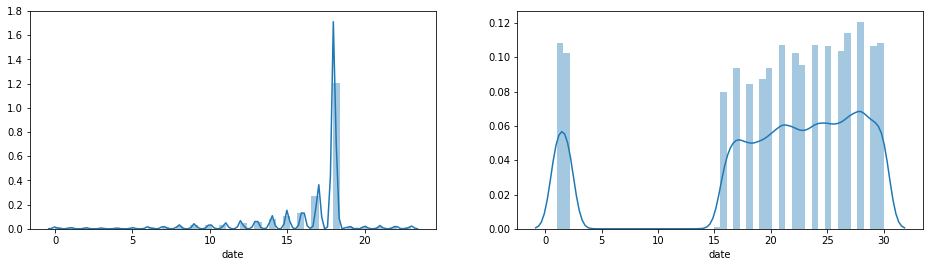

In [139]:
import seaborn as sns
%pylab inline
fig, (ax1, ax2) = subplots(nrows=1,ncols=2,figsize=(16, 4))
sns.distplot(hours, ax = ax1)
sns.distplot(date_tw, ax = ax2)

In [186]:
#making a list of all hashtags
tweets_all['hashtag'] = np.where(tweets_all['hashtag'].isnull(), 'missing', tweets_all['hashtag'])
tweets_all['hashtag'] = tweets_all['hashtag'].apply(lambda x: x.split('#')[1:])   

import re
#remove retweets
tweets_all['tweets'] = tweets_all['tweets'].apply(lambda x: ''.join(re.sub('https?://.*','',x)))
#remove pictures
tweets_all['tweets'] = tweets_all['tweets'].apply(lambda x: ''.join(re.sub('pic.twitter.*','',x)))